In [1]:
import pandas as pd
import numpy as np
import datetime

## Data Cleaned

In [2]:
df = pd.read_csv('../data/combine_df.csv')
User_Watched = pd.read_csv('../data/user_bookings.csv')
df = df.drop(['Unnamed: 0'], axis=1)
User_Watched = User_Watched.drop(['Unnamed: 0'], axis=1)
df

,BookingID,UserID,ProviderID,HotelID,BookDate,HotelType,HotelRank,Days_Since_Booked,Month
0,17556,2591,1,88879,2018-08-11 10:01:20,2,5,1657,8
1,17557,3101,1,88879,2018-08-13 14:51:16,2,5,1655,8
2,17598,3101,1,88879,2018-12-20 14:59:32,2,5,1526,12
3,17604,9459937,1,88879,2019-01-23 10:31:13,2,5,1492,1
4,17619,9465793,1,88879,2019-02-12 14:29:12,2,5,1472,2
...,...,...,...,...,...,...,...,...,...
58243,73132,9466488,2,109268,2022-11-16 16:14:36,1,4,99,11
58244,73266,9468430,1,9948,2022-11-17 16:20:39,1,3,98,11
58245,73310,9467397,1,112749,2022-11-17 18:49:09,1,4,98,11
58246,73371,9468018,2,109281,2022-11-18 12:10:21,1,3,97,11


In [3]:
User_Watched

,UserID,HotelID,Number_Booked,Number_Booked_log
0,2976,2956,3,2.098612
1,9459937,2956,11,3.397895
2,9463950,2956,3,2.098612
3,9463953,2956,1,1.000000
4,9463965,2956,1,1.000000
...,...,...,...,...
13887,9467819,198734,1,1.000000
13888,9468018,198734,1,1.000000
13889,9468212,198734,1,1.000000
13890,9468430,198734,10,3.302585


## Most Popular Hotels

In [4]:
most_popular = df['HotelID'].value_counts().sort_values(ascending= False).index.tolist()
most_popular = pd.DataFrame(most_popular)
most_popular = most_popular.rename(columns = {0 : "HotelID"})
most_popular.index = most_popular.index + 1

most_popular1 = df['HotelID'].value_counts(normalize = True).sort_values(ascending= False).tolist()
most_popular1 = pd.DataFrame(most_popular1)
most_popular1 = most_popular1.rename(columns = {0 : "Frequency (%)"})
most_popular1.index = most_popular1.index + 1

most_popular1['Frequency (%)'] = most_popular1['Frequency (%)'].apply(lambda x: x*100)
most_popular = most_popular.join(most_popular1)
most_popular

,HotelID,Frequency (%)
1,88879,7.183079
2,110228,2.868768
3,109179,2.552877
4,109267,2.420684
5,138996,2.123678
...,...,...
1432,737466,0.001717
1433,201284,0.001717
1434,877882,0.001717
1435,782881,0.001717


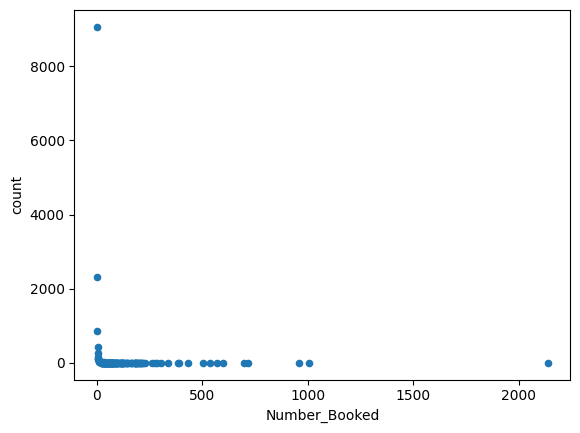

In [5]:
import matplotlib.pyplot as plt


counts = User_Watched['Number_Booked'].value_counts()
counts_df = counts.reset_index()
counts_df.columns = ['Number_Booked', 'count']
counts_df.plot(kind='scatter', x='Number_Booked', y='count')

plt.show()

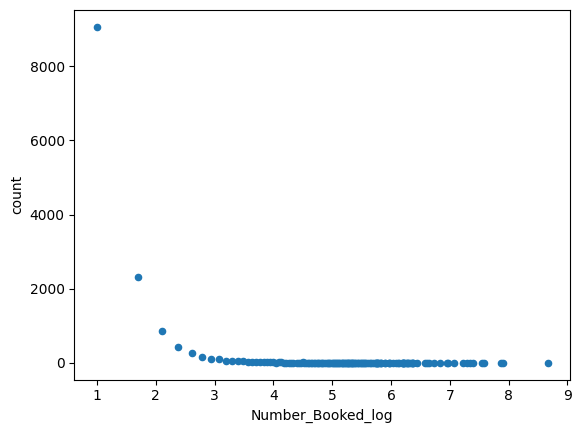

In [6]:

counts = User_Watched['Number_Booked_log'].value_counts()
counts_df = counts.reset_index()

counts_df.columns = ['Number_Booked_log', 'count']
counts_df.plot(kind='scatter', x='Number_Booked_log', y='count')

plt.show()

## DataFrame preparation for the following three plots

In [7]:
df = pd.read_csv('../data/combine_df.csv')
# for plotting distribution on hotels vs how many times they were booke
df2 = df[['HotelID']]
unique_movie = df2.HotelID.unique()
print(len(unique_movie))

# for plotting distribution on users vs. their booking times
df3 = df[['UserID']]
unique_users = df3.UserID.unique()
print(len(unique_users))
df3['UserID'].value_counts()[9468430]

# for plotting # of bookings distribution based on the year.
df4 = df[['BookDate']]
print(df4.shape[0])
print(df4)

1436
1839
58248
                  BookDate
0      2018-08-11 10:01:20
1      2018-08-13 14:51:16
2      2018-12-20 14:59:32
3      2019-01-23 10:31:13
4      2019-02-12 14:29:12
...                    ...
58243  2022-11-16 16:14:36
58244  2022-11-17 16:20:39
58245  2022-11-17 18:49:09
58246  2022-11-18 12:10:21
58247  2022-11-18 13:01:19

[58248 rows x 1 columns]


## Plot distribution on hotels vs their booking times.

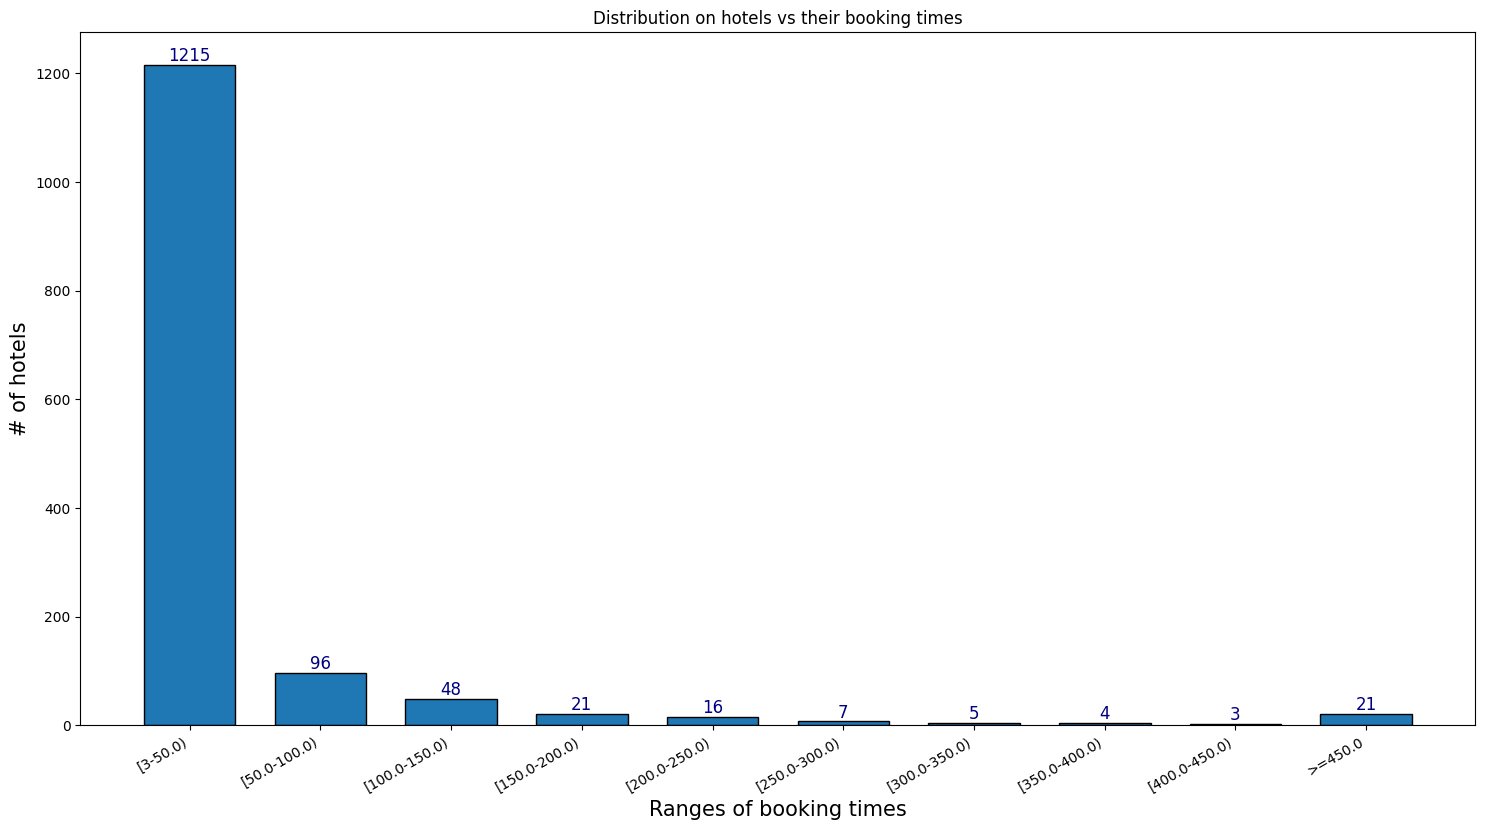

In [8]:
def movie_totalBooking(df):
    '''Input: df with column movieId
    return a map from movieId to the number of bookings.'''
    
    assert isinstance(df, pd.DataFrame)
    month_map = dict()
    for row in df.itertuples():
        ID = row[1]
        assert isinstance(ID, int)
        if ID not in month_map:
            month_map[ID] = 1
        else:
            month_map[ID] += 1
    return month_map

mapping = movie_totalBooking(df2)
row_count = 0
for key in mapping:
    row_count += mapping[key]
# print(row_count)


maxBooking = 0
maxMovieID = 0
for movie in mapping:
    if mapping[movie] > maxBooking:
        maxBooking = mapping[movie]
        maxMovieID = movie
# print(maxBooking)
# print(maxMovieID)

no_of_bins = 10       # the default value for the hist function
min_value = 0
max_value = 500
bin_size = (max_value - min_value)/no_of_bins
lower_boundary = min_value
upper_boundary = min_value + bin_size

x_axis_name = []
ranges = []
for i in range(no_of_bins):
    x = ''
    ranges.append([lower_boundary, upper_boundary])
    if i == 0:
        x = "[3-" +  str(upper_boundary) + ")"
    elif i == no_of_bins - 1:
        x = ">=" + str(lower_boundary)
    else:
        x = "[" + str(lower_boundary) + "-"+ str(upper_boundary) + ")"
    lower_boundary = upper_boundary
    upper_boundary = upper_boundary + bin_size
    x_axis_name.append(x)

col_vals = [0 for i in range(10)]
# print(col_vals)

for movie in mapping:
    bookings = mapping[movie]
    idx = 0
    inInterval = False
    for interval in ranges:
        if idx == len(ranges) - 1 or (bookings >= interval[0] and bookings < interval[1]):
            col_vals[idx] += 1
            break 
        idx += 1
# print(col_vals)

forDrawingData = []
bins_n = 1
for i in col_vals:
    for j in range(i):
        forDrawingData.append(bins_n)
    bins_n += 1
# print(forDrawingData)
fig, ax = plt.subplots(figsize=(18, 9))
bins = np.arange(1,no_of_bins + 2)
values, xxx, bars = ax.hist(forDrawingData, bins = bins, edgecolor="k", align='left', rwidth=0.7)
ax.set_xticks(bins[:-1])
ax.set_xticklabels([i  for i in x_axis_name] )
plt.ylabel("# of hotels",fontsize=15)
plt.xlabel("Ranges of booking times",fontsize=15)
ax.set_title('Distribution on hotels vs their booking times')
plt.bar_label(bars, fontsize=12, color='navy')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

# Plot distribution on users vs. their booking times.

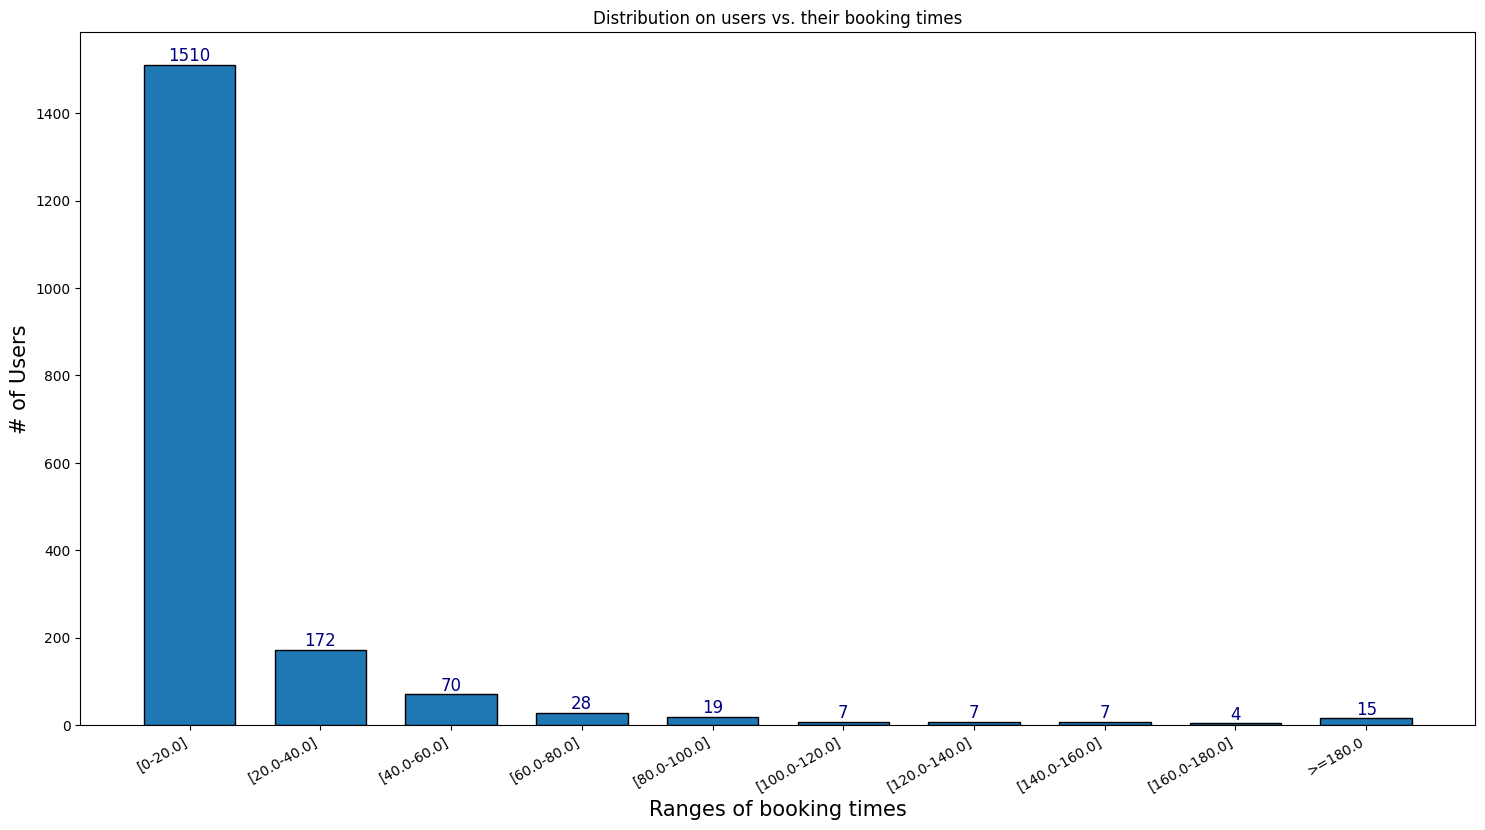

In [9]:
def user_totalBooking(df):
    '''Input: df with column userID
    return a map from userID to the number of bookings'''
    assert isinstance(df, pd.DataFrame)
    month_map = dict()
    for row in df.itertuples():
        userID = row[1]
        assert isinstance(userID, int)
        if userID not in month_map:
            month_map[userID] = 1
        else:
            month_map[userID] += 1
    return month_map

# Usage:
mapping = user_totalBooking(df3)
row_count = 0
for key in mapping:
    row_count += mapping[key]
# print(row_count)

maxBooking = 0
maxUserID = 0
for userID in mapping:
    if mapping[userID] > maxBooking:
        maxBooking = mapping[userID]
        maxUserID = userID
# print(maxBooking)
# print(maxUserID)

no_of_bins = 10       # the default value for the hist function
min_value = 0
max_value = 200
bin_size = (max_value - min_value)/no_of_bins

# Show the bin boundary values
# initiate values
lower_boundary = min_value
upper_boundary = min_value + bin_size

x_axis_name = []
ranges = []
for i in range(no_of_bins):
    x = ''
    ranges.append([lower_boundary, upper_boundary])
    if i == no_of_bins - 1:
        x = ">=" + str(lower_boundary)
    else:
        x = "[" + str(lower_boundary) + "-"+ str(upper_boundary) + "]"
    lower_boundary = upper_boundary
    upper_boundary = upper_boundary + bin_size
    x_axis_name.append(x)
col_vals = [0 for i in range(10)]
# print(col_vals)

for userID in mapping:
    bookings = mapping[userID]
    idx = 0
    inInterval = False
    for interval in ranges:
        if idx == len(ranges) - 1 or (bookings >= interval[0] and bookings < interval[1]):
            col_vals[idx] += 1
            break 
        idx += 1
# print(sum(col_vals))
# print(col_vals)

forDrawingData = []
bins_n = 1
for i in col_vals:
    for j in range(i):
        forDrawingData.append(bins_n)
    bins_n += 1
# print(forDrawingData)

fig, ax = plt.subplots(figsize=(18, 9))
bins = np.arange(1,no_of_bins + 2)
values, xxx, bars = ax.hist(forDrawingData, bins = bins, edgecolor="k", align='left', rwidth=0.7)
ax.set_xticks(bins[:-1])
ax.set_xticklabels([i  for i in x_axis_name] )
plt.xlabel("Ranges of booking times",fontsize=15)
plt.ylabel("# of Users",fontsize=15)
ax.set_title('Distribution on users vs. their booking times')
plt.bar_label(bars, fontsize=12, color='navy')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

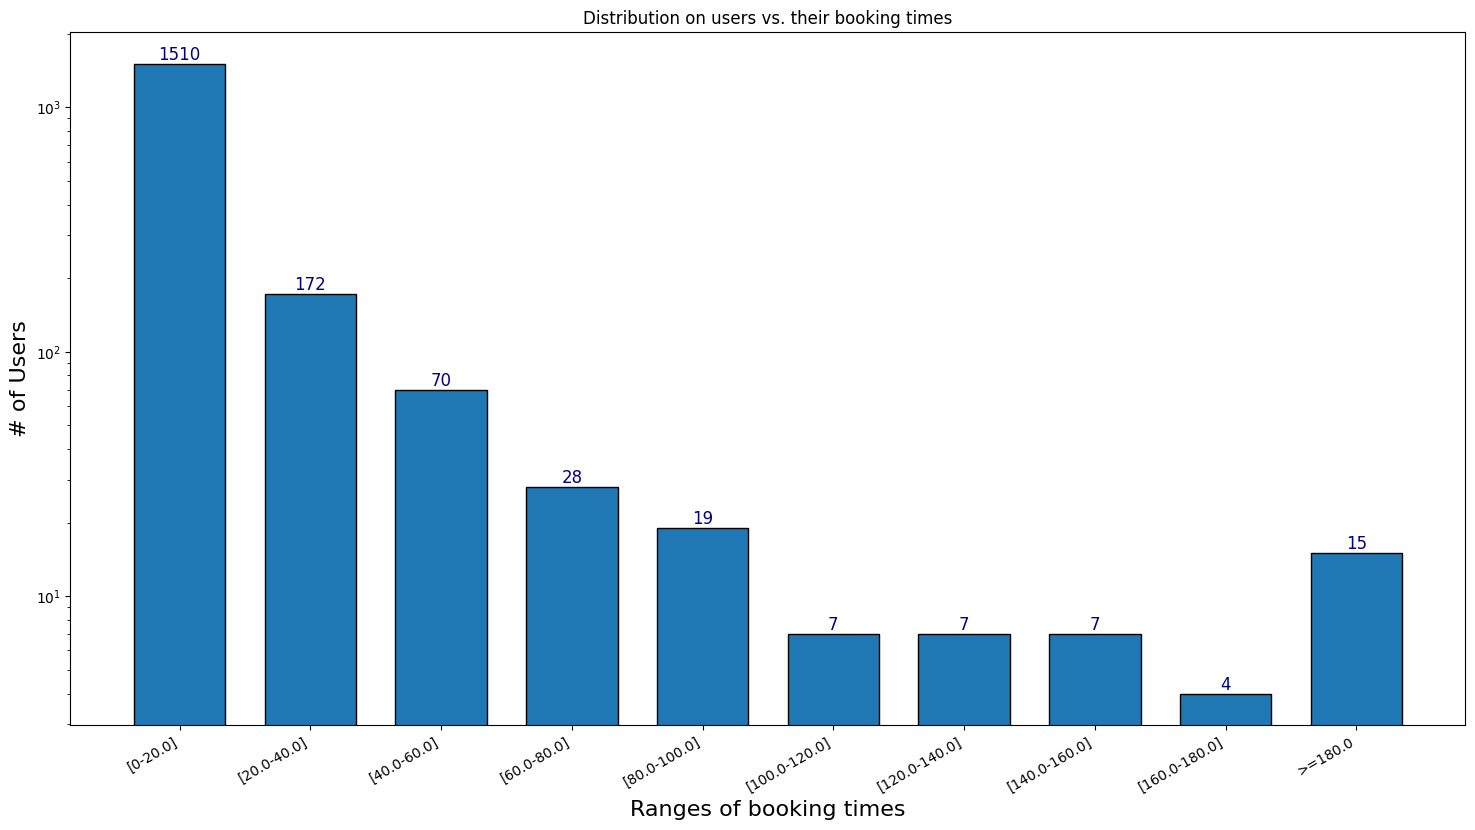

In [10]:
mapping = user_totalBooking(df3)
row_count = 0
for key in mapping:
    row_count += mapping[key]
# print(row_count)

maxBooking = 0
maxUserID = 0
for userID in mapping:
    if mapping[userID] > maxBooking:
        maxBooking = mapping[userID]
        maxUserID = userID
# print(maxBooking)
# print(maxUserID)

no_of_bins = 10       # the default value for the hist function
min_value = 0
max_value = 200
bin_size = (max_value - min_value)/no_of_bins

# Show the bin boundary values
# initiate values
lower_boundary = min_value
upper_boundary = min_value + bin_size

x_axis_name = []
ranges = []
for i in range(no_of_bins):
    x = ''
    ranges.append([lower_boundary, upper_boundary])
    if i == no_of_bins - 1:
        x = ">=" + str(lower_boundary)
    else:
        x = "[" + str(lower_boundary) + "-"+ str(upper_boundary) + "]"
    lower_boundary = upper_boundary
    upper_boundary = upper_boundary + bin_size
    x_axis_name.append(x)
col_vals = [0 for i in range(10)]
# print(col_vals)

for userID in mapping:
    bookings = mapping[userID]
    idx = 0
    inInterval = False
    for interval in ranges:
        if idx == len(ranges) - 1 or (bookings >= interval[0] and bookings < interval[1]):
            col_vals[idx] += 1
            break 
        idx += 1
# print(sum(col_vals))
# print(col_vals)

forDrawingData = []
bins_n = 1
for i in col_vals:
    for j in range(i):
        forDrawingData.append(bins_n)
    bins_n += 1
# print(forDrawingData)

fig, ax = plt.subplots(figsize=(18, 9))
bins = np.arange(1,no_of_bins + 2)
values, xxx, bars = ax.hist(forDrawingData, bins = bins, edgecolor="k", align='left', rwidth=0.7)
ax.set_xticks(bins[:-1])
ax.set_xticklabels([i  for i in x_axis_name] )
plt.xlabel("Ranges of booking times",fontsize=16)
plt.ylabel("# of Users",fontsize=16)
ax.set_title('Distribution on users vs. their booking times')
plt.yscale('log')
plt.bar_label(bars, fontsize=12, color='navy')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

# Plot bookings distribution based on the year.

58248
[45, 1204, 4571, 22352, 30076]
58248


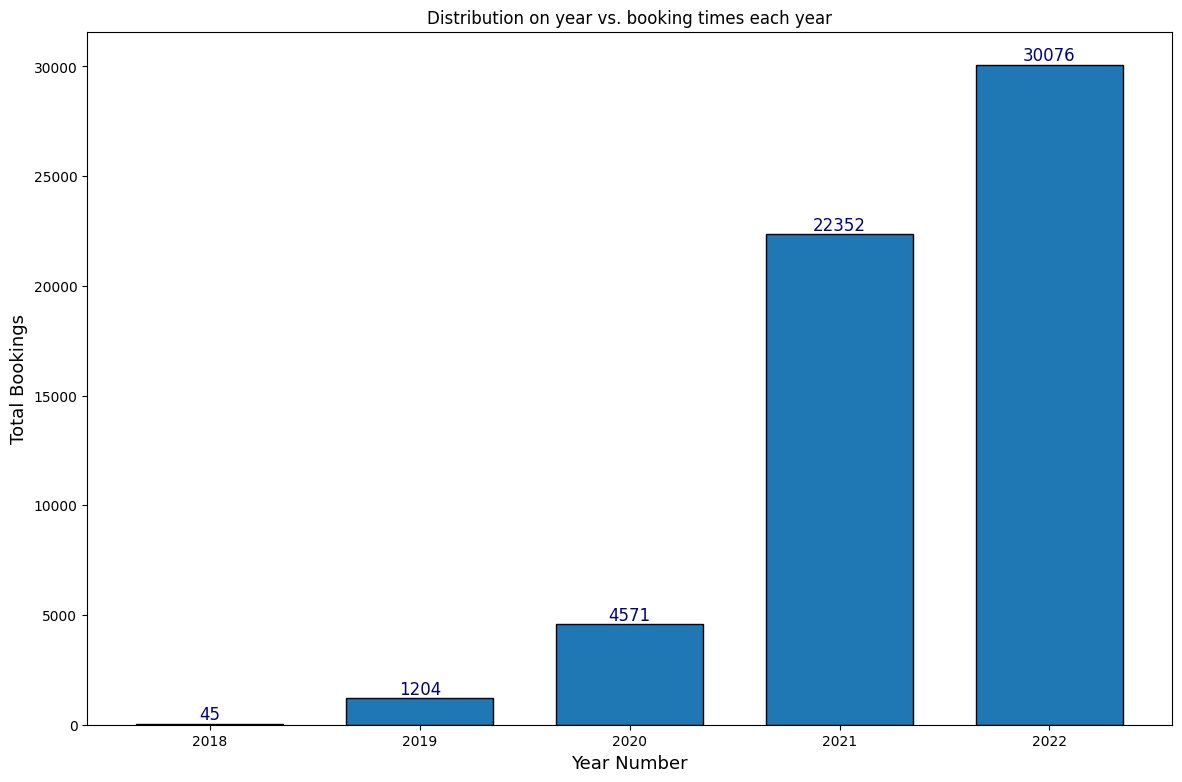

In [11]:
def year_totalBooking(df):
    '''Input: df with column movieId and watchData
    return a map from movieID to a list of booking sum
    of each month.'''
    assert isinstance(df, pd.DataFrame)
    yr_map = dict()
    for row in df.itertuples():
        date = row[1]
        assert isinstance(date, str) and len(date) == 19
        dateInfo = date.split(' ')[0].split('-')
        yr = int(dateInfo[0])
        if yr not in yr_map:
            yr_map[yr] = 1
        else:
            yr_map[yr] += 1
    return yr_map


# Usage:
yr_mapping = year_totalBooking(df4)
row_count = 0
for key in yr_mapping:
    row_count += yr_mapping[key]

x_axis_name = list(yr_mapping.keys())

col_vals = [0 for i in range(5)]

forDrawingData = []
for yr in yr_mapping:
    col_vals[yr-2018] = yr_mapping[yr]
print(sum(col_vals))
print(col_vals)

val = 1
for count in col_vals:
    for i in range(count):
        forDrawingData.append(val)
    val += 1
print(len(forDrawingData))

fig, ax = plt.subplots(figsize=(14,9))
bins = np.arange(1, 5 + 2)
values, xxx, bars = ax.hist(forDrawingData, bins = bins, edgecolor="k", align='left', rwidth=0.7)
ax.set_xticks(bins[:-1])
ax.set_xticklabels([i  for i in x_axis_name] )

plt.xlabel("Year Number",fontsize=13)
plt.ylabel("Total Bookings",fontsize=13)
ax.set_title('Distribution on year vs. booking times each year')
plt.bar_label(bars, fontsize=12, color='navy')
plt.show()

Other stuff

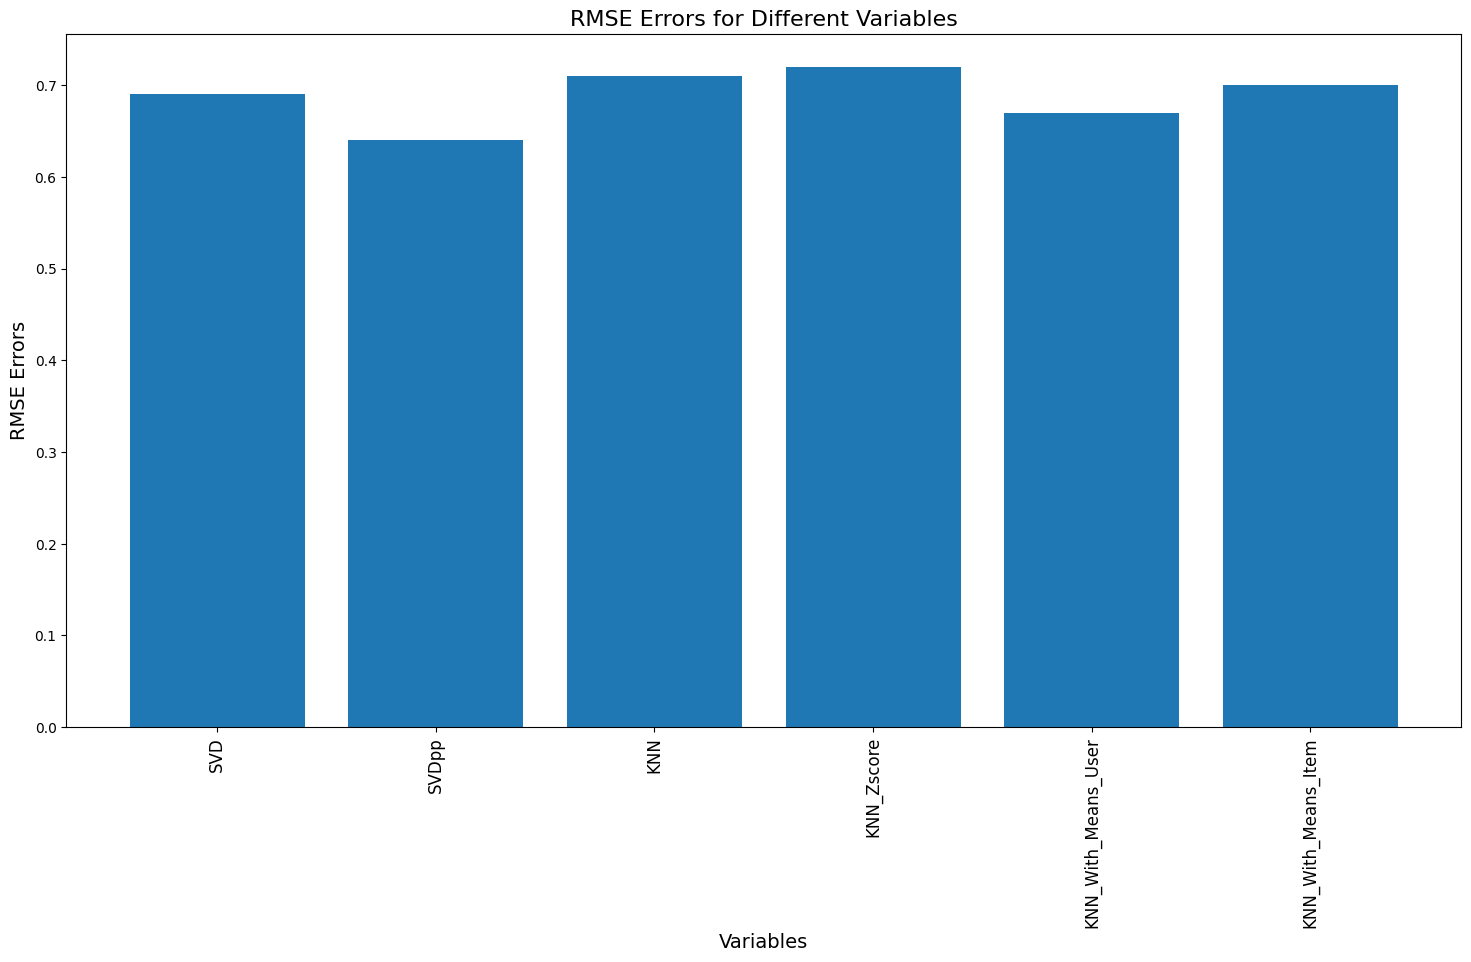

In [12]:
import matplotlib.pyplot as plt

variables = ['SVD', 'SVDpp', 'KNN', 'KNN_Zscore', 'KNN_With_Means_User', 'KNN_With_Means_Item']
rmse_errors = [0.69, 0.64, 0.71, 0.72, 0.67, 0.70]

plt.figure(figsize=(18, 9))
plt.bar(variables, rmse_errors)
plt.xticks(rotation='vertical', fontsize=12)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('RMSE Errors', fontsize=14)
plt.title('RMSE Errors for Different Variables', fontsize=16)
plt.show()

## The following 2 plots: Number of Bookings per month (Normal vs log-scaled)

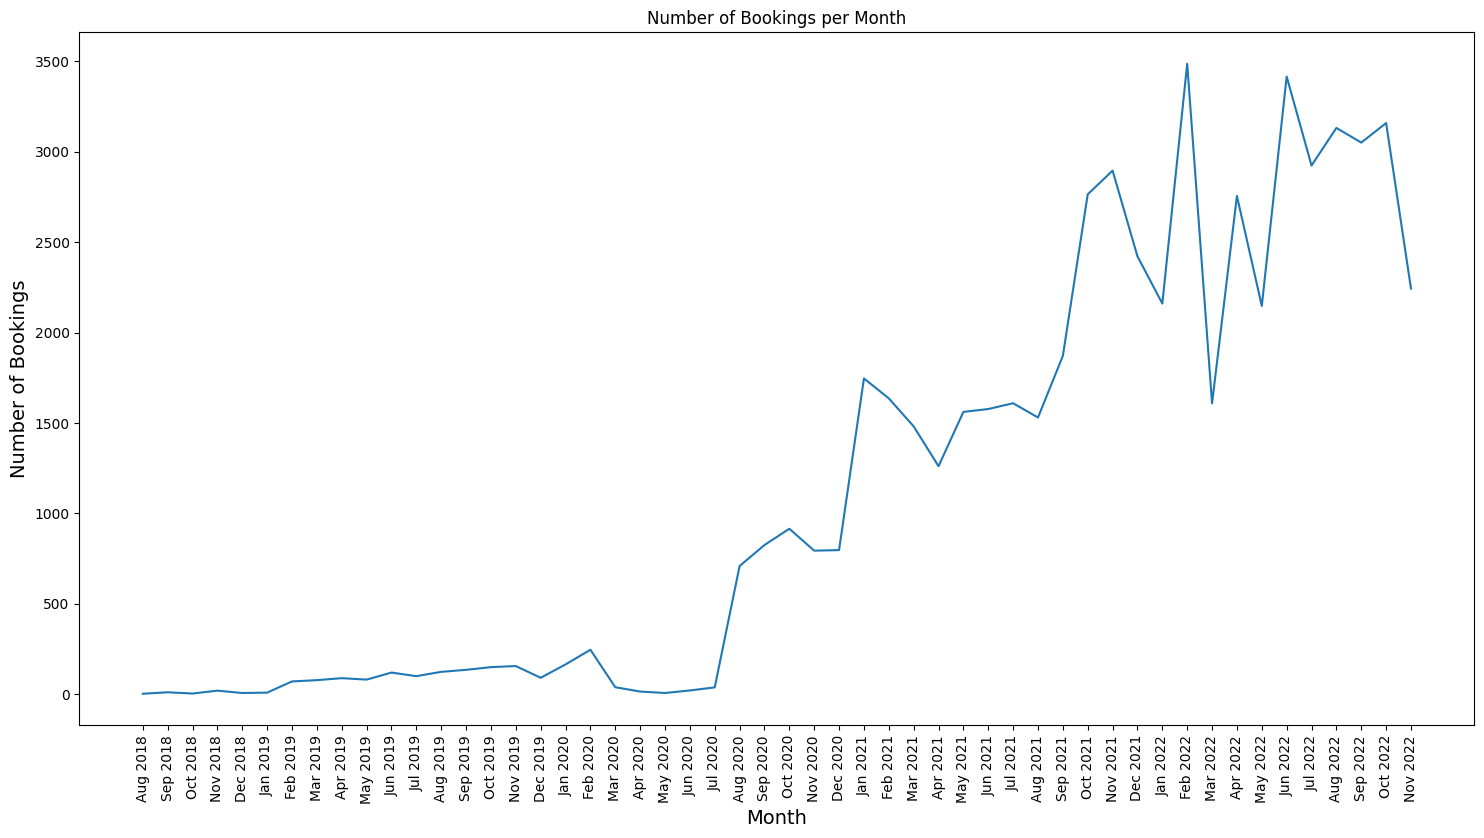

In [13]:
# Convert WatchDate to datetime object
df['BookDate'] = pd.to_datetime(df['BookDate'])

# Filter data to the desired date range
start_date = pd.to_datetime('2018-08-01')
end_date = pd.to_datetime('2022-11-30')
df_filtered = df.loc[(df['BookDate'] >= start_date) & (df['BookDate'] <= end_date)]

# Extract month and year from the WatchDate column
df_filtered['Month'] = pd.Categorical(df_filtered['BookDate'].dt.strftime('%b %Y'), 
                                      categories=pd.date_range(start=start_date, end=end_date, freq='MS').strftime('%b %Y'))

# Compute the number of bookings per month
bookings_per_month = df_filtered.groupby('Month')['BookDate'].count()

# Plot the data
plt.figure(figsize=(18, 9))
plt.plot(bookings_per_month.index, bookings_per_month.values)
plt.xticks(rotation='vertical')
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of Bookings',fontsize=14)
plt.title('Number of Bookings per Month')
plt.show()

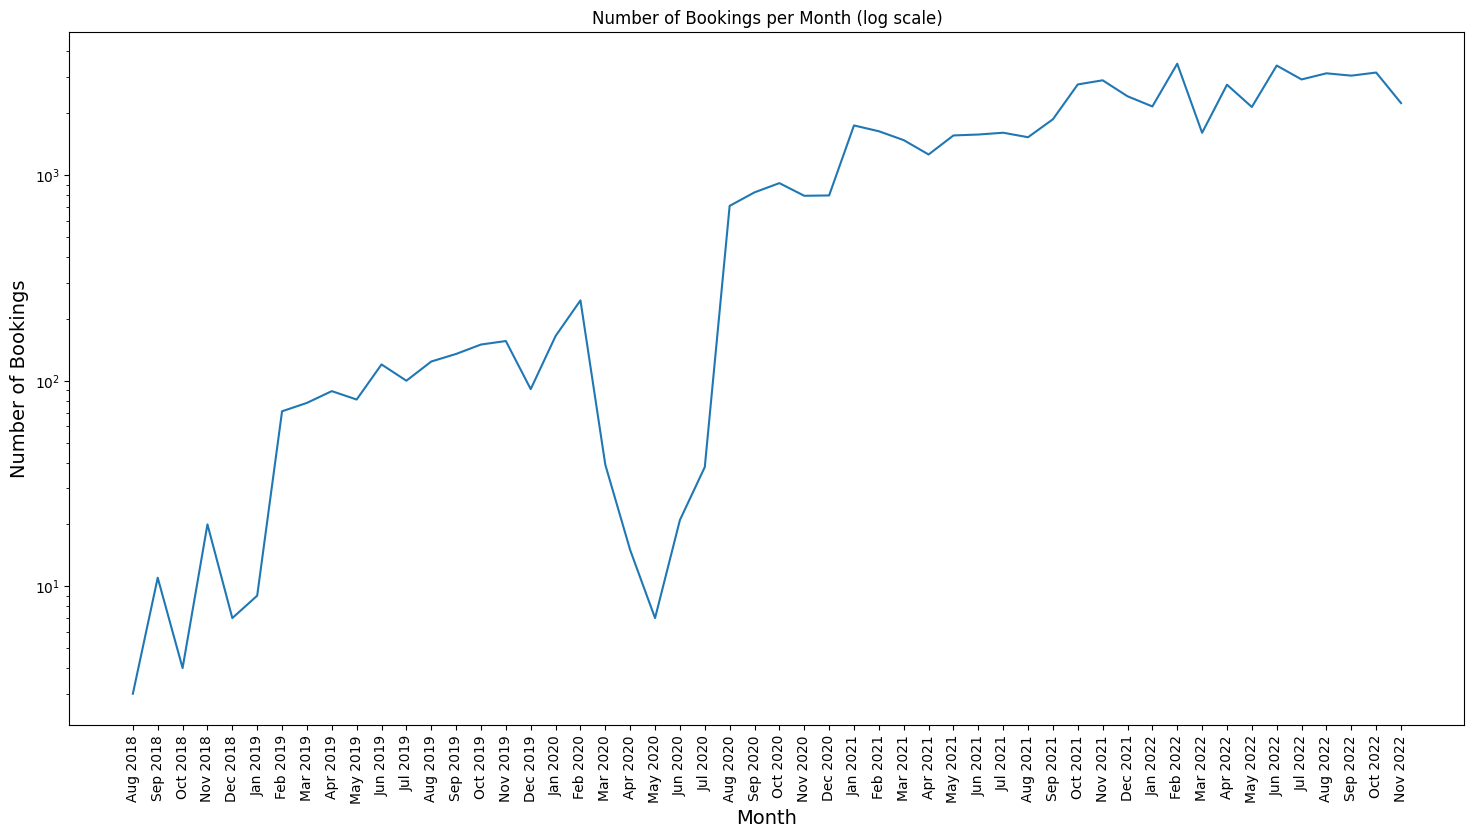

In [14]:
# Convert WatchDate to datetime object
df['BookDate'] = pd.to_datetime(df['BookDate'])

# Filter data to the desired date range
start_date = pd.to_datetime('2018-08-01')
end_date = pd.to_datetime('2022-11-30')
df_filtered = df.loc[(df['BookDate'] >= start_date) & (df['BookDate'] <= end_date)]

# Extract month and year from the WatchDate column
df_filtered['Month'] = pd.Categorical(df_filtered['BookDate'].dt.strftime('%b %Y'), 
                                      categories=pd.date_range(start=start_date, end=end_date, freq='MS').strftime('%b %Y'))

# Compute the number of bookings per month
bookings_per_month = df_filtered.groupby('Month')['BookingID'].count()

# Plot the data
plt.figure(figsize=(18, 9))
plt.plot(bookings_per_month.index, bookings_per_month.values)
plt.xticks(rotation='vertical')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.yscale('log')
plt.title('Number of Bookings per Month (log scale)')
plt.show()

/tmp/ipykernel_1002658/581717202.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_filtered.loc[:, 'Month'] = pd.Categorical(df_filtered['Month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


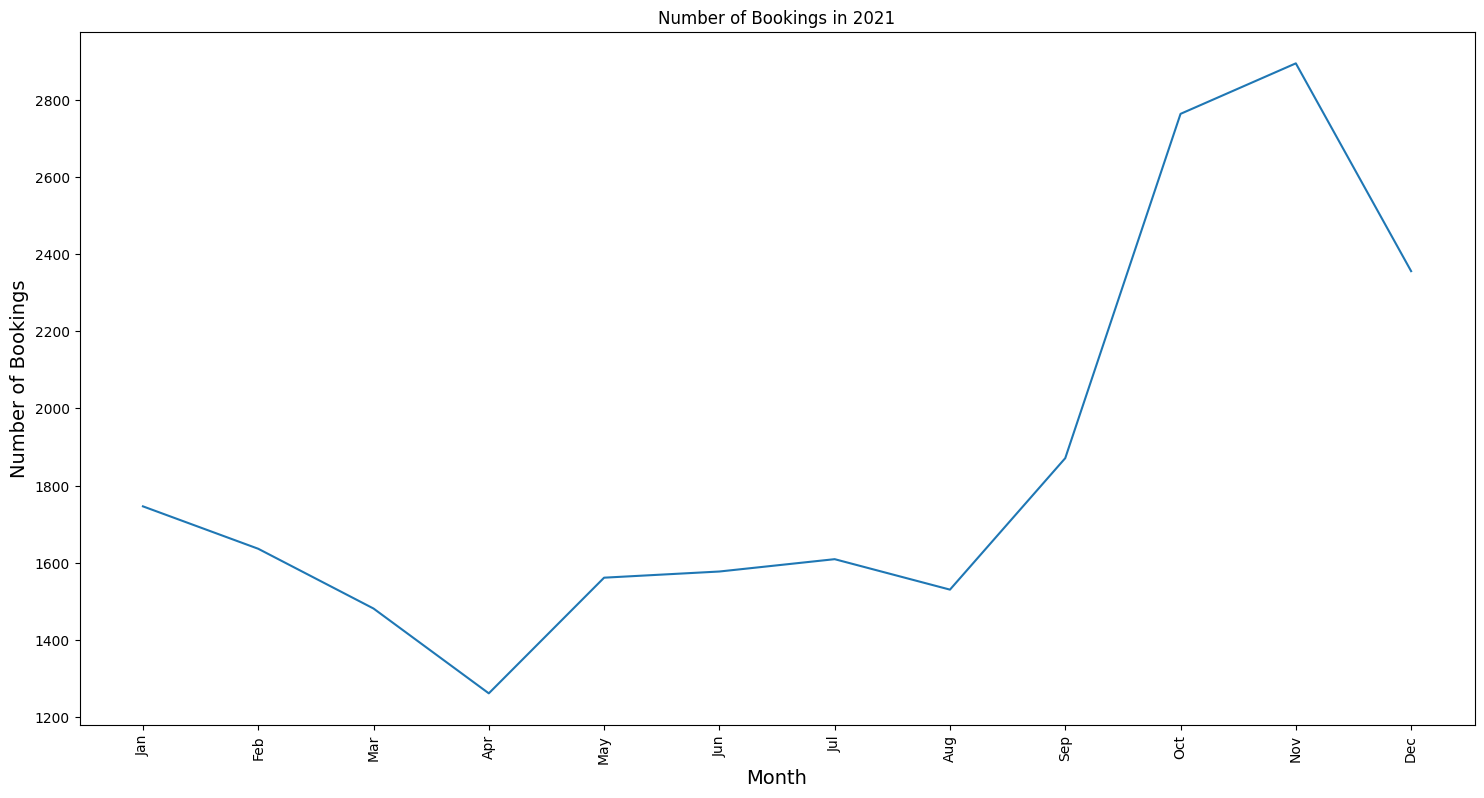

In [15]:
# Convert WatchDate to datetime object
df['BookDate'] = pd.to_datetime(df['BookDate'])

# Filter data to the desired date range (2021)
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2021-12-31')
df_filtered = df.loc[(df['BookDate'] >= start_date) & (df['BookDate'] <= end_date)].copy()

# Extract month and year from the WatchDate column
df_filtered.loc[:, 'Month'] = df_filtered['BookDate'].dt.month_name().str.slice(stop=3)
df_filtered.loc[:, 'Month'] = pd.Categorical(df_filtered['Month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Compute the number of bookings per month
bookings_per_month = df_filtered.groupby('Month')['BookingID'].count()

# Plot the data
plt.figure(figsize=(18, 9))
plt.plot(bookings_per_month.index, bookings_per_month.values)
plt.xticks(rotation='vertical')
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of Bookings',fontsize=14)
plt.title('Number of Bookings in 2021')
plt.show()

## Proportion of monthly booking and seasonal booking

/tmp/ipykernel_1002658/2824086070.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_filtered.loc[:, 'Month'] = pd.Categorical(df_filtered['Month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


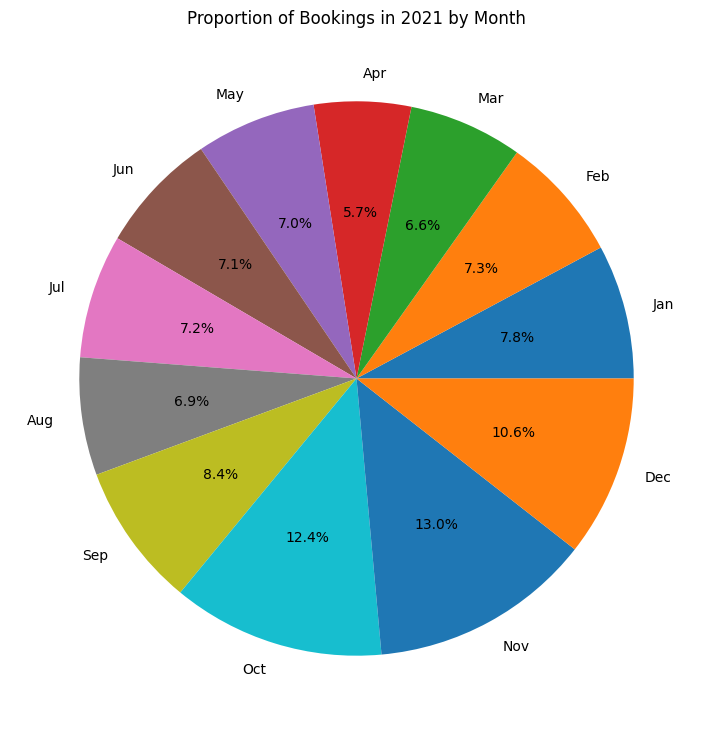

In [16]:
# Convert WatchDate to datetime object
df['BookDate'] = pd.to_datetime(df['BookDate'])

# Filter data to the desired date range (2021)
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2021-12-31')
df_filtered = df.loc[(df['BookDate'] >= start_date) & (df['BookDate'] <= end_date)].copy()

# Extract month and year from the WatchDate column
df_filtered.loc[:, 'Month'] = df_filtered['BookDate'].dt.month_name().str.slice(stop=3)
df_filtered.loc[:, 'Month'] = pd.Categorical(df_filtered['Month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Compute the number of bookings per month
bookings_per_month = df_filtered.groupby('Month')['BookingID'].count()

# Create a pie chart of the data
plt.figure(figsize=(18, 9))
plt.pie(bookings_per_month.values, labels=bookings_per_month.index, autopct='%1.1f%%')
plt.title('Proportion of Bookings in 2021 by Month')
plt.show()

/tmp/ipykernel_1002658/1939763996.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_filtered.loc[:, 'Season'] = df_filtered.loc[:, 'Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


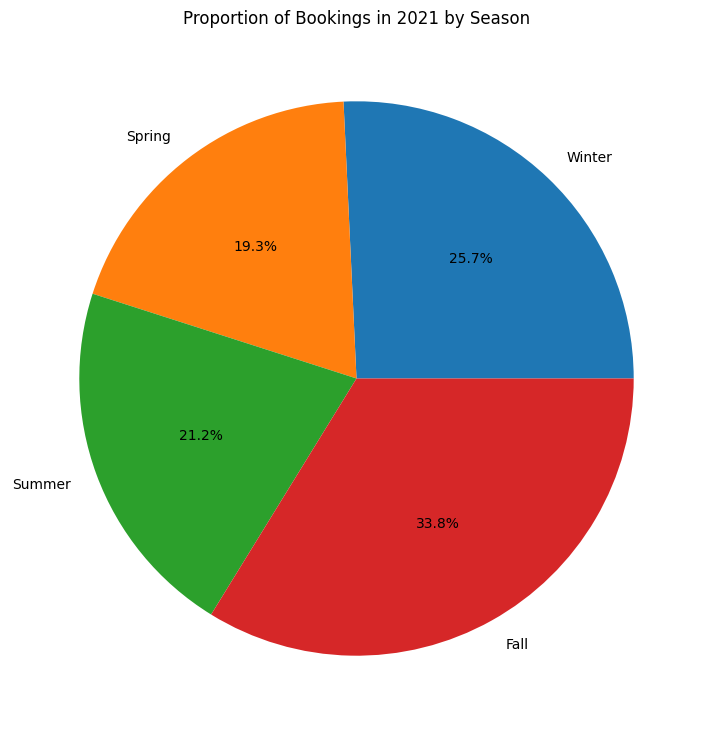

Winter: 5738
Spring: 4303
Summer: 4716
Fall: 7530


In [17]:
# Convert WatchDate to datetime object
df['BookDate'] = pd.to_datetime(df['BookDate'])

# Filter data to the desired date range (2021)
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2021-12-31')
df_filtered = df.loc[(df['BookDate'] >= start_date) & (df['BookDate'] <= end_date)].copy()

# Extract season from the WatchDate column
df_filtered.loc[:, 'Season'] = (df_filtered['BookDate'].dt.month%12 + 3)//3
df_filtered.loc[:, 'Season'] = pd.Categorical(df_filtered['Season'], categories=[1,2,3,4], ordered=True)
df_filtered.loc[:, 'Season'] = df_filtered.loc[:, 'Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Compute the number of bookings per season
bookings_per_season = df_filtered.groupby('Season')['BookingID'].count()

# Create a pie chart of the data
plt.figure(figsize=(18, 9))
plt.pie(bookings_per_season.values, labels=bookings_per_season.index, autopct='%1.1f%%')
plt.title('Proportion of Bookings in 2021 by Season')
plt.show()

# Print the actual number of bookings per season
for season, bookings in bookings_per_season.items():
    print(f"{season}: {bookings}")

/tmp/ipykernel_1002658/2210962282.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_filtered.loc[:, 'Season'] = df_filtered.loc[:, 'Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


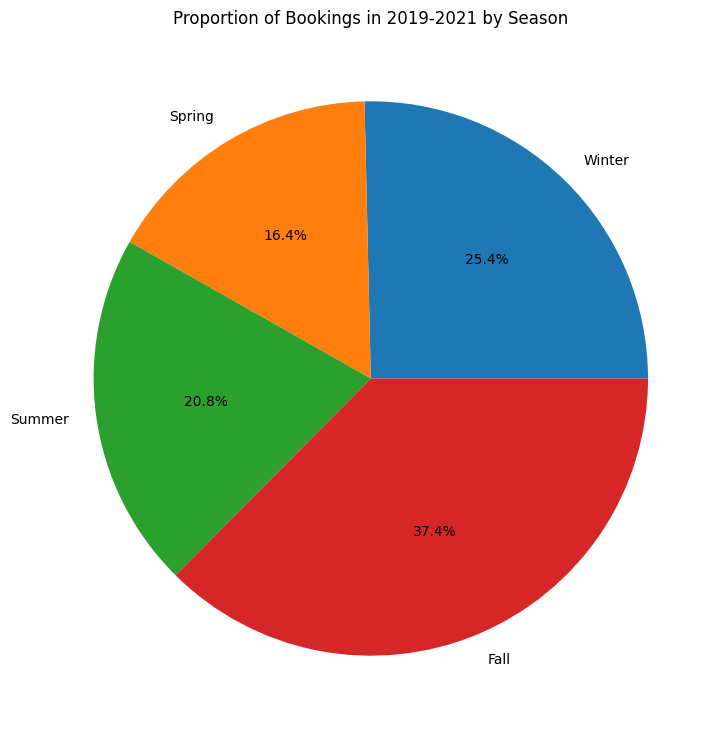

In [18]:
# Convert WatchDate to datetime object
df['BookDate'] = pd.to_datetime(df['BookDate'])

# Filter data to the desired date range (2019-2021)
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2021-12-31')
df_filtered = df.loc[(df['BookDate'] >= start_date) & (df['BookDate'] <= end_date)].copy()

# Extract season from the WatchDate column
df_filtered.loc[:, 'Season'] = (df_filtered['BookDate'].dt.month%12 + 3)//3
df_filtered.loc[:, 'Season'] = pd.Categorical(df_filtered['Season'], categories=[1,2,3,4], ordered=True)
df_filtered.loc[:, 'Season'] = df_filtered.loc[:, 'Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Compute the number of bookings per season
bookings_per_season = df_filtered.groupby('Season')['BookingID'].count()

# Create a pie chart of the data
plt.figure(figsize=(18, 9))
plt.pie(bookings_per_season.values, labels=bookings_per_season.index, autopct='%1.1f%%')
plt.title('Proportion of Bookings in 2019-2021 by Season')
plt.show()

## Monthly booking observation per hotel and recommendation

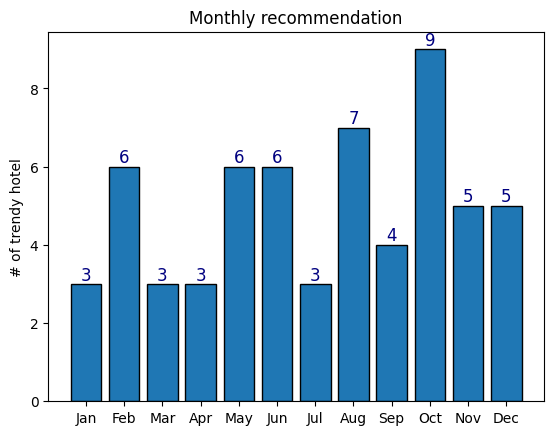

In [19]:
import sys
sys.path.append('../src/')

import datetime
from datetime import datetime as dt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from monthly_reccomendation import hotel_sd_mapping, booking_maps, hotel_gt_booking


def monthTrendyPlot(hotels_count):
    '''plot # of trendy hotels based on month '''
    assert isinstance(hotels_count, list)
    assert len(hotels_count) == 12
    for i in hotels_count:
        assert isinstance(i, int)

    forDrawingData = []
    for i in range(1, 13):
        for j in range(hotels_count[i - 1]):
            forDrawingData.append(i)
    # print(forDrawingData)
    fig, ax = plt.subplots()
    bins = np.arange(1, 14)
    values, xxx, bars = ax.hist(forDrawingData, bins=bins, edgecolor="k", align='left', rwidth=0.8)
    ax.set_xticks(bins[:-1])
    ax.set_xticklabels([datetime.date(2020, i, 1).strftime('%b') for i in bins[:-1]])
    plt.ylabel("# of trendy hotel")
    ax.set_title('Monthly recommendation')
    plt.bar_label(bars, fontsize=12, color='navy')
    plt.show()

if __name__ == "__main__":
    df = pd.read_csv("../data/combine_df.csv")
    df2 = df[['HotelID', 'BookDate']]
    month_map = booking_maps(df2)
    hotel_list = hotel_gt_booking(df2, 250)
    hotels_count = []
    for month in range(1, 12 + 1):
        mapping = hotel_sd_mapping(month_map, hotel_list, month, weightEqual=False, sd_diff=1.5)
        hotels_count.append(len(mapping))
    monthTrendyPlot(hotels_count)